# PRESENTACIÓN PROYECTO MACHINE LEARNING

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from matplotlib import pyplot as plt

<p align="center">
  <img src="img/pollution1.png" width="700" style="border-radius: 25px;">
</p>

## Descripción del Dataset

Dataset sintético con 3000 registros que simulan escenarios de contaminación del suelo y enfermedades asociadas. Incluye variables ambientales, agrícolas, demográficas y de salud.

Principales características:

- Contaminantes y concentraciones del suelo

- Condiciones del suelo y clima

- Enfermedades, severidad y síntomas

- Segmentos demográficos afectados

- Medidas de mitigación y resolución de casos

| Columna                           | Descripción                                                                                             |
| --------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **Case_ID**                       | Identificador único del caso reportado.                                                                 |
| **Date_Reported**                 | Fecha en que se registró el caso.                                                                       |
| **Region**                        | Región geográfica donde ocurre el caso.                                                                 |
| **Country**                       | País donde ocurre el caso.                                                                              |
| **Pollutant_Type**                | Tipo de contaminante detectado en el suelo.                                                             |
| **Pollutant_Concentration_mg_kg** | Concentración del contaminante en mg/kg. Rango real: **~10–300 mg/kg**. Ejemplos: 78.04, 16.33, 167.33. |
| **Soil_pH**                       | Nivel de acidez/alcalinidad del suelo. Rango real: **5.0–8.5**. Ejemplos: 8.30, 7.96, 5.35.             |
| **Temperature_C**                 | Temperatura ambiental en °C. Rango real: **10–40°C**. Ejemplos: 35.6, 31.0, 16.4.                       |
| **Humidity_%**                    | Humedad relativa del aire en porcentaje. Rango real: **20%–90%**. Ejemplos: 64.9, 73.1, 33.8.           |
| **Rainfall_mm**                   | Precipitación acumulada en mm. Rango real: **0–300 mm**. Ejemplos: 62.4, 8.2, 121.7.                    |
| **Crop_Type**                     | Tipo de cultivo presente en la zona afectada.                                                           |
| **Farming_Practice**              | Método agrícola utilizado (orgánico, intensivo, sostenible…).                                           |
| **Nearby_Industry**               | Industria cercana que puede influir en la contaminación.                                                |
| **Water_Source_Type**             | Tipo de fuente de agua (pozo, río, lluvia…).                                                            |
| **Soil_Texture**                  | Textura del suelo (Sandy, Silty, Clay, Loamy).                                                          |
| **Soil_Organic_Matter_%**         | Porcentaje de materia orgánica del suelo. Rango real: **0.5%–10%**. Ejemplos: 1.98, 9.71, 5.49.         |
| **Disease_Type**                  | Tipo de enfermedad (Cancer, Neurological Disorder, etc.).                                               |
| **Disease_Severity**              | Severidad de la enfermedad (Mild, Moderate, Severe).                                                    |
| **Health_Symptoms**               | Síntomas principales reportados.                                                                        |
| **Age_Group_Affected**            | Grupo de edad afectado (Children, Adults, Elderly).                                                     |
| **Gender_Most_Affected**          | Género más afectado (Male, Female, Both).                                                               |
| **Mitigation_Measure**            | Medida aplicada para mitigar el problema.                                                               |
| **Case_Resolved**                 | Indica si el caso ha sido resuelto (Yes/No).                                                            |
| **Follow_Up_Required**            | Indica si requiere seguimiento adicional (Yes/No).                                                      |


## Target

Disease_Severity

Disease_Type

In [2]:
df = pd.read_csv("data/soil_pollution_diseases.csv")
df.head()

,Case_ID,Date_Reported,Region,Country,Pollutant_Type,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,...,Soil_Texture,Soil_Organic_Matter_%,Disease_Type,Disease_Severity,Health_Symptoms,Age_Group_Affected,Gender_Most_Affected,Mitigation_Measure,Case_Resolved,Follow_Up_Required
0,CASE_100000,2024-09-12,Africa,Pakistan,Lead,78.04,8.30,35.6,64.9,62.4,...,Sandy,1.98,Gastrointestinal Disease,Moderate,Breathing Difficulty,Adults,Male,Government Regulation,No,Yes
1,CASE_100001,2024-01-01,Africa,Germany,Lead,16.33,7.96,31.0,73.1,8.2,...,Silty,9.71,Cancer,Mild,Breathing Difficulty,Elderly,Both,Community Awareness,Yes,No
2,CASE_100002,2025-02-24,Europe,Germany,Lead,167.33,5.35,16.4,33.8,121.7,...,Clay,5.49,Gastrointestinal Disease,Severe,Nausea,Children,Both,Soil Remediation,Yes,No
3,CASE_100003,2024-09-24,Asia,USA,Lead,89.23,5.66,31.4,30.5,116.9,...,Silty,3.98,Neurological Disorder,Severe,Fatigue,Adults,Male,Community Awareness,Yes,No
4,CASE_100004,2023-05-24,Africa,India,Chromium,93.93,7.64,17.0,58.6,237.0,...,Loamy,0.94,Skin Disease,Moderate,Breathing Difficulty,Children,Female,Government Regulation,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Case_ID                        3000 non-null   object 
 1   Date_Reported                  3000 non-null   object 
 2   Region                         3000 non-null   object 
 3   Country                        3000 non-null   object 
 4   Pollutant_Type                 3000 non-null   object 
 5   Pollutant_Concentration_mg_kg  3000 non-null   float64
 6   Soil_pH                        3000 non-null   float64
 7   Temperature_C                  3000 non-null   float64
 8   Humidity_%                     3000 non-null   float64
 9   Rainfall_mm                    3000 non-null   float64
 10  Crop_Type                      3000 non-null   object 
 11  Farming_Practice               3000 non-null   object 
 12  Nearby_Industry                2418 non-null   o

In [5]:
df.describe()

,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Soil_Organic_Matter_%
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,102.745587,6.463747,27.225100,58.222867,200.31660,5.175093
std,55.907366,1.166305,10.084577,21.357711,115.27187,2.761633
min,5.030000,4.500000,10.000000,20.000000,0.00000,0.500000
25%,54.425000,5.457500,18.500000,39.900000,100.60000,2.760000
50%,104.085000,6.450000,27.000000,58.450000,199.00000,5.130000
75%,151.472500,7.490000,35.825000,76.800000,299.75000,7.550000
max,199.990000,8.500000,45.000000,95.000000,399.70000,10.000000


In [3]:
df["Disease_Severity"].value_counts()

Disease_Severity
Severe      1023
Moderate     998
Mild         979
Name: count, dtype: int64

In [25]:
df["Disease_Type"].value_counts()

Disease_Type
Cancer                      622
Skin Disease                622
Neurological Disorder       597
Respiratory Issues          581
Gastrointestinal Disease    578
Name: count, dtype: int64

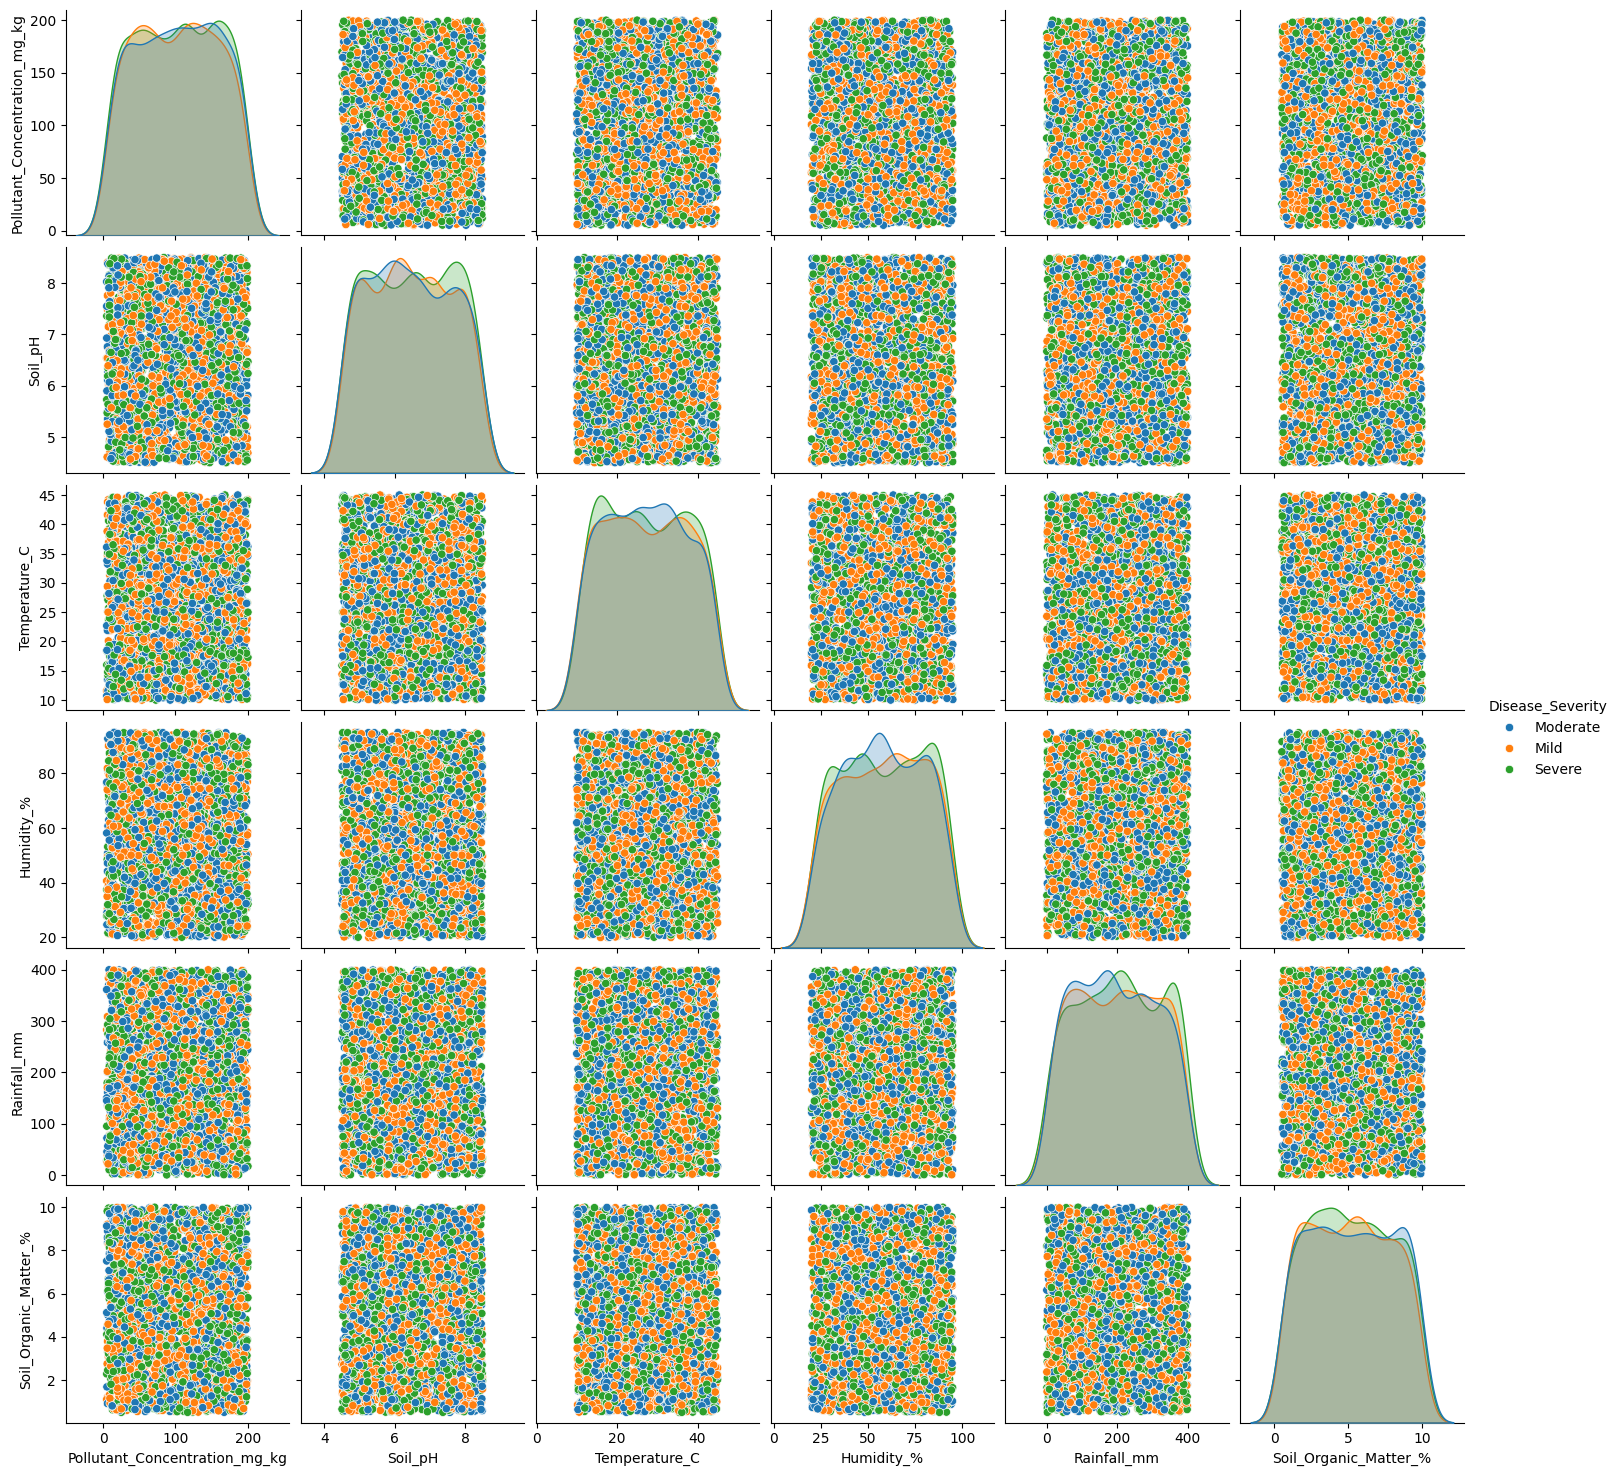

In [8]:
sns.pairplot(df, hue="Disease_Severity")

In [13]:
orden = [["Mild", "Moderate", "Severe"]]

encoder = OrdinalEncoder(categories=orden)

df["Disease_Severity_enc"] = encoder.fit_transform(df[["Disease_Severity"]]) 

In [14]:
df.corr(numeric_only=True)

,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Soil_Organic_Matter_%,Disease_Severity_enc
Pollutant_Concentration_mg_kg,1.000000,0.007033,0.009678,-0.040899,0.020506,0.027290,0.011126
Soil_pH,0.007033,1.000000,-0.014724,-0.020102,-0.005299,0.000226,0.013532
Temperature_C,0.009678,-0.014724,1.000000,-0.026802,0.032773,-0.037816,0.004225
Humidity_%,-0.040899,-0.020102,-0.026802,1.000000,-0.002770,0.022800,0.003310
Rainfall_mm,0.020506,-0.005299,0.032773,-0.002770,1.000000,-0.012259,0.019984
Soil_Organic_Matter_%,0.027290,0.000226,-0.037816,0.022800,-0.012259,1.000000,0.009417
Disease_Severity_enc,0.011126,0.013532,0.004225,0.003310,0.019984,0.009417,1.000000


<Axes: >

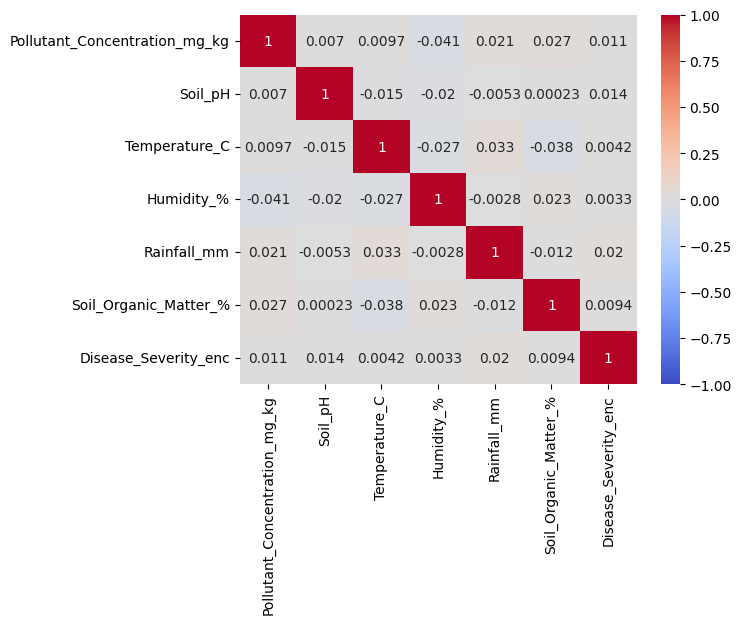

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot = True, vmin=-1, cmap="coolwarm")

Las variables numéricas tienen un bajísima correlación lineal, pero pueden existir correlaciones no lineales o depender de interacciones con otras variables.

La severidad puede depender de combinaciones, no de variables individuales. 

Ejemplos:

Alta concentración de contaminante + baja humedad → mayor severidad.

Suelo ácido + cierto tipo de cultivo → mayor riesgo de enfermedad grave.

In [22]:
df["Country"].value_counts()

Country
China        319
USA          317
Mexico       314
India        311
Nigeria      309
Pakistan     305
Brazil       293
Germany      283
Australia    278
Kenya        271
Name: count, dtype: int64

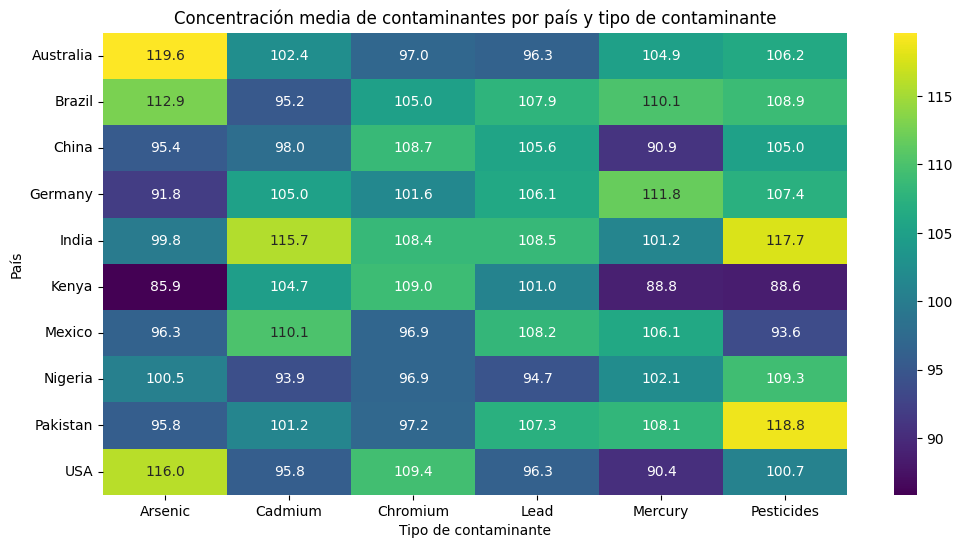

In [24]:
tabla_paises = df.pivot_table(
    index="Country",
    columns="Pollutant_Type",
    values="Pollutant_Concentration_mg_kg",
    aggfunc="mean"
)

plt.figure(figsize=(12,6))
sns.heatmap(tabla_paises, annot=True, fmt=".1f", cmap="viridis")
plt.title("Concentración media de contaminantes por país y tipo de contaminante")
plt.xlabel("Tipo de contaminante")
plt.ylabel("País")
plt.show()

## Objetivo

Analizar la relación entre contaminación del suelo y enfermedades asociadas, utilizando variables ambientales, agrícolas y demográficas, para predecir la severidad de las enfermedades como un problema de clasificación (Mild, Moderate, Severe).

Dado que las correlaciones lineales entre las variables numéricas y la severidad son muy bajas, se plantea un análisis predictivo basado en modelos de clasificación que puedan capturar relaciones no lineales e interacciones complejas.

- Las variables numéricas (concentración de contaminantes, pH, temperatura, humedad, lluvia, materia orgánica) sean normalizadas o estandarizadas.

- Las variables categóricas (tipo de contaminante, suelo, región, edad, género, tipo de enfermedad) sean codificadas mediante técnicas como One-Hot Encoding u Ordinal Encoding según corresponda.
